In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("FOMC_minutes.csv") 

In [3]:
df["QuarterEnd"] = df.date.apply(lambda date: pd.to_datetime(date) + pd.offsets.QuarterEnd())
df["WordCount"] = df.statements.apply(lambda x: len(x.split()))

In [4]:
df.head(10)

,date,statements,QuarterEnd,WordCount
0,2/4/1994,Chairman Alan Greenspan announced today that t...,1994-03-31,99
1,3/22/1994,Chairman Alan Greenspan announced today that t...,1994-03-31,39
2,4/18/1994,Chairman Alan Greenspan announced today that t...,1994-06-30,36
3,5/17/1994,The Federal Reserve today announced two action...,1994-06-30,164
4,8/16/1994,The Federal Reserve announced today the follow...,1994-09-30,137
5,11/15/1994,The Federal Reserve Board today approved an in...,1994-12-31,142
6,2/1/1995,The Federal Reserve Board today approved an in...,1995-03-31,145
7,7/6/1995,Chairman Alan Greenspan announced today that t...,1995-09-30,71
8,12/19/1995,Chairman Alan Greenspan announced today that t...,1995-12-31,86
9,1/31/1996,The Federal Reserve today announced the follow...,1996-03-31,140


In [5]:
df2 = df.set_index("QuarterEnd").groupby(pd.Grouper(freq='Q')).sum()
df2.columns = ['Sum']

In [6]:
df2.head(10)

,Sum
QuarterEnd,
1994-03-31,138
1994-06-30,200
1994-09-30,137
1994-12-31,142
1995-03-31,145
1995-06-30,0
1995-09-30,71
1995-12-31,86
1996-03-31,140


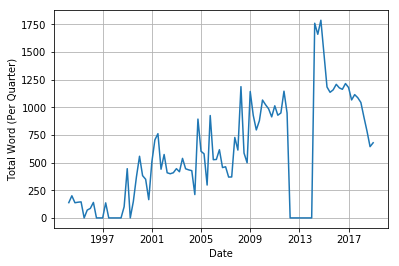

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(df2.index, df2.Sum)
ax.set(xlabel = "Date", ylabel = "Total Word (Per Quarter)")
ax.grid()

plt.show()

In [19]:
import numpy as np
speech = np.random.multinomial(n=1000, pvals=[2/10,1/10,4/10,1/10,2/10], size=1)
""" Multinomial Distribution:
There were 194 counts of "inflation", in order to find this random number, I used
a multinomial distribution. This was the best choice because there were 5 seperate
possibilities of a specific-word being in a 1000 word document. Through this
distribution, I was able to simulate a random distribution with 5 different percent/
probability values. I was also able to set the n-number of experiments to 1000 since
we needed to simulate a 1000 word speech. Other distributions like the bernoulli or
binomial distribution would'nt of been well suited for this case b/c they would
only simulate a two possible outcomes over different sized experiments. 
"""
speech

array([[221,  92, 402,  84, 201]])

In [20]:
print("Inflation\t\t: ", int(speech[0,0]))
print("Employment\t\t: ", int(speech[0,1]))
print("Interest Rate\t\t: ", int(speech[0,2]))
print("International Trade\t: ", int(speech[0,3]))
print("Banking Sector\t\t: ", int(speech[0,4]))
# The "interest rate" topic dominates the randomly generated speech

Inflation		:  221
Employment		:  92
Interest Rate		:  402
International Trade	:  84
Banking Sector		:  201


In [40]:
speech2 = np.random.multinomial(n=1000, pvals=[2/10,1/10,4/10,1/10,2/10], size=100)

In [53]:
speech2.shape

(100, 5)

In [70]:
%time
def most_common_topic_full(ith):
    words = ["Inflation","Employment","Interest Rate","International Trade","Banking Sector"]
    value = np.max(speech2[ith])
    # In case there are two max count-words used the equal amount of times
    indxs = [indx for indx,num in enumerate(speech2[ith]) if num == value]
    for indx in indxs:
        print(words[indx],"\t: ", int(speech2[ith][indx]))

most_common_topic_full(4)
print(speech2[4])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
Interest Rate 	:  377
[211 101 377  96 215]


In [93]:
speech3 = list()

%time
def most_common_topic_max(ith):
    words = ["Inflation","Employment","Interest Rate","International Trade","Banking Sector"]
    for speech in speech2:
        x = np.argmax(speech)
        speech3.append([words[x],speech[x]])
    print(speech3[ith])
    
most_common_topic_max(4)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
['Interest Rate', 377]


In [13]:
df = pd.DataFrame({'Inflation':speech2[:,0],'Employment':speech2[:,1],
                   'Interest Rate':speech2[:,2],'International Trade':speech2[:,3],
                   'Banking Sector':speech2[:,4]})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Inflation              100 non-null int64
Employment             100 non-null int64
Interest Rate          100 non-null int64
International Trade    100 non-null int64
Banking Sector         100 non-null int64
dtypes: int64(5)
memory usage: 4.0 KB
None


,Inflation,Employment,Interest Rate,International Trade,Banking Sector
0,218,107,375,106,194
1,212,110,391,90,197
2,216,75,382,122,205
3,215,104,371,94,216
4,184,107,407,99,203


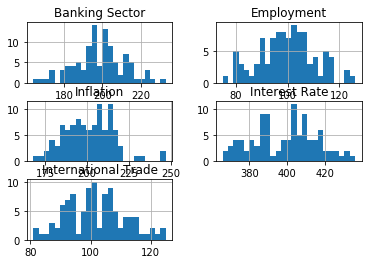

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=25)
""" Interpretation:
Through analyizing each graph, I noticed that each of the words "Employment", 
"International Trade" and "Banking Sector" followed a somewhat normal distribution. 
Meanwhile, the word "Inflation" had a skewed distribution and also the second highest 
level of standard deviation, suggesting that the average word count deviated from the mean. 
However, the word "Interest Rate" had bimodal distribution and also the highest standard
deviation. The results were very interesting from this random multinomial distribution.

"""
plt.show()

In [17]:
df.describe()

,Inflation,Employment,Interest Rate,International Trade,Banking Sector
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,201.150000,99.810000,398.900000,101.730000,198.410000
std,14.670368,10.553084,16.622062,9.766832,13.001239
min,168.000000,75.000000,366.000000,81.000000,164.000000
25%,191.000000,93.750000,387.000000,94.000000,191.750000
50%,201.500000,100.000000,401.000000,101.000000,198.000000
75%,211.250000,107.000000,410.000000,108.000000,206.000000
max,247.000000,126.000000,436.000000,125.000000,233.000000
